# Quick Start Examples

This notebook contains examples featured in the README documentation:
- Basic stock price segmentation (AAPL)
- Accessing segment properties
- Custom segment classification
- Synthetic signal examples (sine, triangular waves)

**Prerequisites:** `pip install trend-classifier yfinance`

## Example 1: Basic Stock Price Segmentation

The simplest way to use trend_classifier with financial data.

In [1]:
import yfinance as yf

from trend_classifier import Segmenter

# Download Apple stock data
df = yf.download("AAPL", start="2018-09-15", end="2022-09-06", interval="1d", progress=False)

# Create segmenter and calculate segments
seg = Segmenter(df=df, column="Adj Close", n=20)
seg.calculate_segments()
seg.plot_segments()

/Users/krystian.safjan/projects/priv/trend_classifier/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/krystian.safjan/projects/priv/trend_classifier/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/krystian.safjan/projects/priv/trend_classifier/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


TypeError: 'list' object is not callable

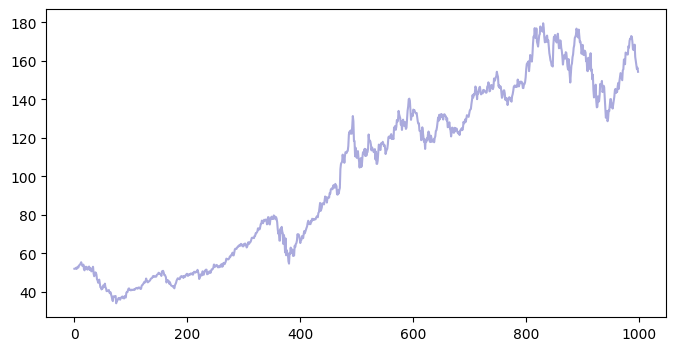

In [2]:
# Number of data points
print(f"Total data points: {len(df)}")
print(f"Segments detected: {len(seg.segments)}")

## Example 2: Accessing Segment Properties

Each segment contains detailed information about the detected trend.

In [4]:
# View the first segment
segment = seg.segments[0]
print(f"Segment representation:\n{repr(segment)}")

999

In [4]:
# Access specific properties
print(f"Start indices: {segment.starts}")
print(f"Stop index: {segment.stop}")
print(f"Slope: {segment.slope:.4f}")

## Example 3: Plotting Individual Segments with Trendlines

In [5]:
# Plot a specific segment with its trendlines (no surrounding context)
seg.plot_segment_with_trendlines_no_context(idx=1)

## Example 4: Custom Segment Classification

Classify segments based on their slope into up/down/horizontal trends.

In [6]:
def segment_classifier(s, threshold=0.1):
    """Classify a segment based on its slope."""
    if s.slope > threshold:
        return "up"
    elif s.slope < -threshold:
        return "down"
    else:
        return "horizontal"


# Classify all segments
for i, s in enumerate(seg.segments):
    classification = segment_classifier(s)
    print(f"Segment {i}: slope={s.slope:.3f} -> {classification}")

'Segment(start=0, stop=9, slope=0.07650329127456246, offset=52.74883096868339, std=0.5403755468434855, span=35.0, reason_for_new_segment=slope, slopes=[-0.08740102438102143], offsets=[54.99972701682186], slopes_std=0.0, offsets_std=0.0)'

In [7]:
# Get indices of each category
up_idx = [i for i, s in enumerate(seg.segments) if segment_classifier(s) == "up"]
down_idx = [i for i, s in enumerate(seg.segments) if segment_classifier(s) == "down"]
horiz_idx = [i for i, s in enumerate(seg.segments) if segment_classifier(s) == "horizontal"]

print(f"Uptrend segments: {up_idx}")
print(f"Downtrend segments: {down_idx}")
print(f"Horizontal segments: {horiz_idx}")

### Visualize Each Category

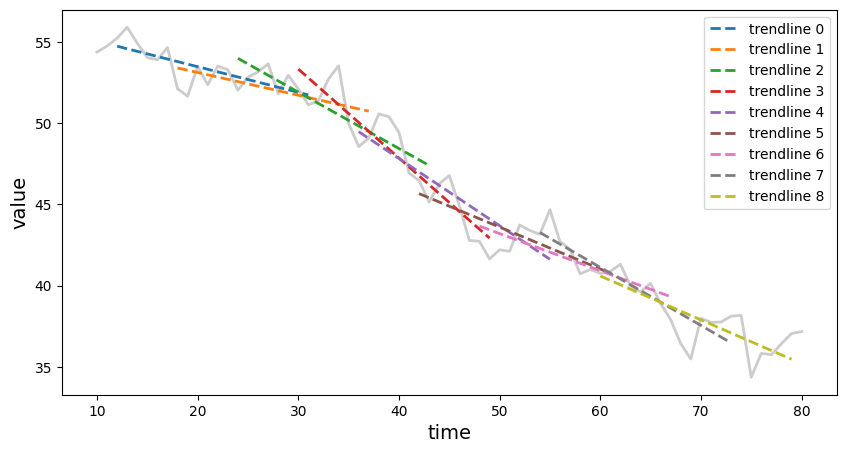

In [18]:
# Plot uptrend segments
if up_idx:
    print("Uptrend segments:")
    seg.plot_segment(up_idx)

In [9]:
# Plot downtrend segments
if down_idx:
    print("Downtrend segments:")
    seg.plot_segment(down_idx)

[6]

In [10]:
# Plot horizontal segments
if horiz_idx:
    print("Horizontal segments:")
    seg.plot_segment(horiz_idx)

9

## Example 5: Synthetic Signals

trend_classifier works with any time series, not just financial data.

### Sine Wave

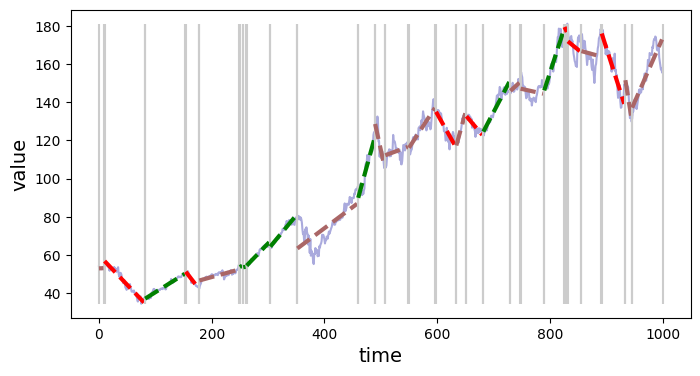

In [26]:
import numpy as np

from trend_classifier import Segmenter

# Generate a sine wave
x = np.linspace(0, 2 * np.pi, 200).tolist()
y = np.sin(x).tolist()

seg = Segmenter(x=x, y=y)
segments = seg.calculate_segments()
seg.plot_segments()

print(f"Detected {len(segments)} segments in sine wave")

### Absolute Sine Wave (Rectified)

In [42]:
x = np.linspace(0, 2 * np.pi, 200).tolist()
y = np.abs(np.sin(x)).tolist()

seg = Segmenter(x=x, y=y)
segments = seg.calculate_segments()
seg.plot_segments()

print(f"Detected {len(segments)} segments in rectified sine wave")

### Triangular Wave (Small Period)

In [30]:
x = list(range(200))
y = (list(range(25)) + list(range(25, 0, -1))) * 4  # 4 cycles

seg = Segmenter(x=x, y=y)
segments = seg.calculate_segments()
seg.plot_segments()

print(f"Detected {len(segments)} segments in triangular wave (small period)")

[7, 8, 9, 10, 13, 15, 17, 18, 20, 26]

### Triangular Wave (Large Period)

In [31]:
x = list(range(200))
y = (list(range(50)) + list(range(50, 0, -1))) * 2  # 2 cycles

seg = Segmenter(x=x, y=y)
segments = seg.calculate_segments()
seg.plot_segments()

print(f"Detected {len(segments)} segments in triangular wave (large period)")

[7, 8, 9, 10, 13, 15, 17, 18, 20, 26]